In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [62]:
plt.figure(figsize=(8, 6))

sns.set(rc={'figure.figsize':(11.7,8.27)})

<Figure size 800x600 with 0 Axes>

In [63]:
df=pd.read_csv("BostonHousing.csv")

In [64]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [66]:
df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [67]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [68]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<Axes: >

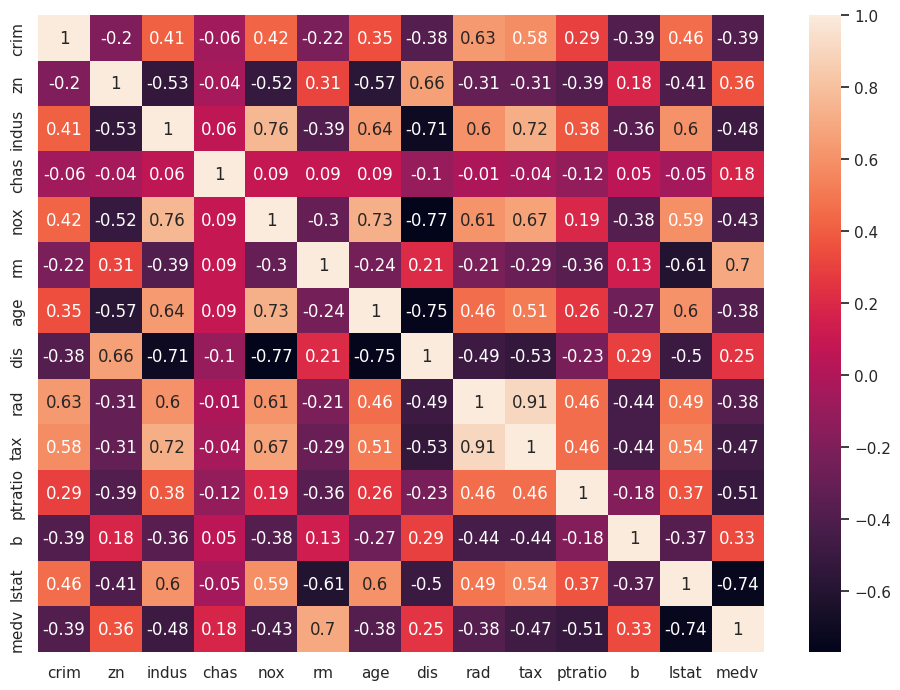

In [69]:
correlation_matrix = df.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [70]:
sns.distplot(df['MEDV'], bins=30)
plt.show()

KeyError: 'MEDV'

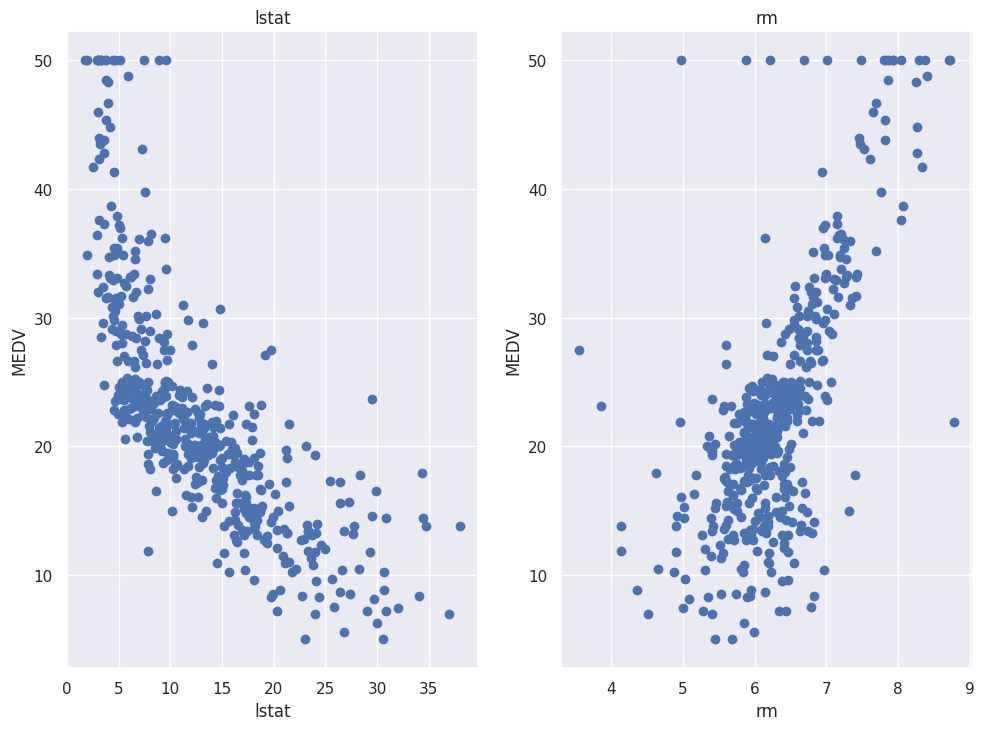

In [47]:
features= ['lstat', 'rm']
for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = df['MEDV']
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [71]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns != 'medv']
y = df.loc[:, df.columns == 'medv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [72]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [75]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(256, input_shape=(13,),activation='relu', name='dense_1'))
model.add(Dense(128, activation='relu', name='dense_layer_2'))
model.add(Dense(64, activation='relu', name='dense_layer_3'))
model.add(Dense(1, activation='relu', name='dense_output'))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 256)               3584      
                                                                 
 dense_layer_2 (Dense)       (None, 128)               32896     
                                                                 
 dense_layer_3 (Dense)       (None, 64)                8256      
                                                                 
 dense_output (Dense)        (None, 1)                 65        
                                                                 
Total params: 44801 (175.00 KB)
Trainable params: 44801 (175.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.05, verbose = 1)

Epoch 1/100
11/11 [==============================] - 0s 11ms/step - loss: 461.6158 - mae: 18.8163 - val_loss: 244.1619 - val_mae: 12.2022
Epoch 2/100
11/11 [==============================] - 0s 4ms/step - loss: 149.3729 - mae: 9.4121 - val_loss: 113.2577 - val_mae: 7.6109
Epoch 3/100
11/11 [==============================] - 0s 4ms/step - loss: 89.0530 - mae: 7.0319 - val_loss: 81.0342 - val_mae: 6.6079
Epoch 4/100
11/11 [==============================] - 0s 4ms/step - loss: 65.6965 - mae: 5.7749 - val_loss: 75.0461 - val_mae: 5.5044
Epoch 5/100
11/11 [==============================] - 0s 4ms/step - loss: 51.1842 - mae: 5.0075 - val_loss: 61.0582 - val_mae: 6.2026
Epoch 6/100
11/11 [==============================] - 0s 3ms/step - loss: 44.5152 - mae: 4.7349 - val_loss: 58.4064 - val_mae: 5.0352
Epoch 7/100
11/11 [==============================] - 0s 4ms/step - loss: 39.6507 - mae: 4.4097 - val_loss: 51.1495 - val_mae: 4.9941
Epoch 8/100
11/11 [==============================] - 0s 4ms/st

In [78]:
mse_nn, mae_nn = model.evaluate(X_test, y_test)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)

5/5 [==============================] - 0s 1ms/step - loss: 19.1434 - mae: 2.9751
Mean squared error on test data:  19.143449783325195
Mean absolute error on test data:  2.9751157760620117
